In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = 'metrics/eval.json'         
aug_path = 'metrics/eval_aug.json'      

with open(base_path, 'r') as f:
    metrics_base = json.load(f)

with open(aug_path, 'r') as f:
    metrics_aug = json.load(f)


In [2]:

models = ['random_forest', 'logistic_regression', 'naive_bayes']
metrics_names = ['accuracy', 'precision', 'recall', 'f1']

data = []
for model in models:
    for metric in metrics_names:
        data.append({
            'Model': model.replace('_', ' ').title(),
            'Metric': metric.title(),
            'Without Augmentation': round(metrics_base[model][metric], 4),
            'With Augmentation': round(metrics_aug[model][metric], 4)
        })

df = pd.DataFrame(data)

df_pivot = df.pivot(index='Model', columns='Metric', values=['Without Augmentation', 'With Augmentation'])
df_pivot

Without Augmentation                            \
Metric                          Accuracy      F1 Precision  Recall   
Model                                                                
Logistic Regression               0.7635  0.7599    0.7598  0.7635   
Naive Bayes                       0.5430  0.5182    0.5884  0.5430   
Random Forest                     0.7963  0.7897    0.7974  0.7963   

                    With Augmentation                            
Metric                       Accuracy      F1 Precision  Recall  
Model                                                            
Logistic Regression            0.6909  0.6834    0.6885  0.6909  
Naive Bayes                    0.5324  0.5062    0.5770  0.5324  
Random Forest                  0.7784  0.7716    0.7803  0.7784

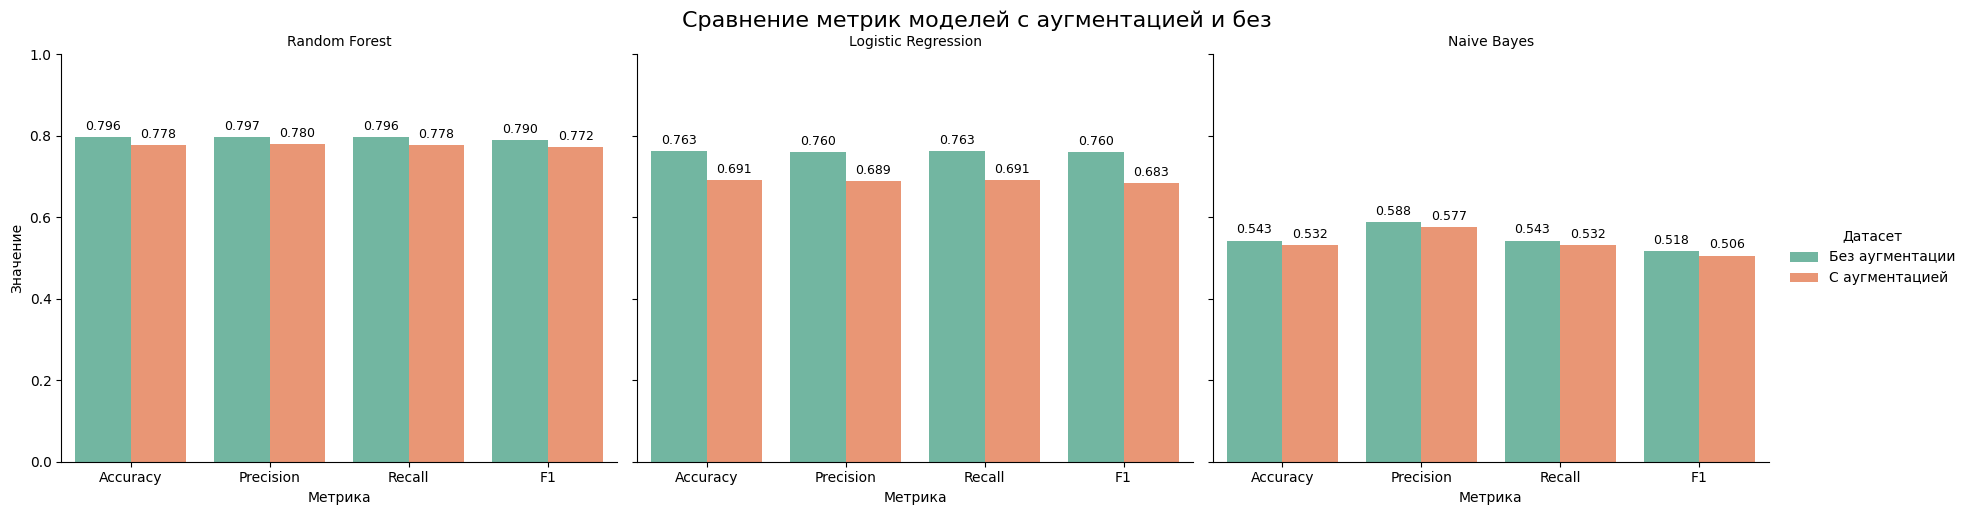

In [3]:
df_plot = df.melt(id_vars=['Model', 'Metric'], var_name='Dataset', value_name='Value')
df_plot['Dataset'] = df_plot['Dataset'].str.replace('Without Augmentation', 'Без аугментации').str.replace('With Augmentation', 'С аугментацией')

g = sns.FacetGrid(df_plot, col='Model', col_wrap=3, height=5, aspect=1.2, sharey=True)
g.map(sns.barplot, 'Metric', 'Value', 'Dataset', palette='Set2', order=['Accuracy', 'Precision', 'Recall', 'F1'], hue_order=['Без аугментации', 'С аугментацией'])

g.add_legend(title='Датасет')
g.set_axis_labels('Метрика', 'Значение')
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Сравнение метрик моделей с аугментацией и без', y=1.02, fontsize=16)
g.set(ylim=(0, 1))

for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2., height + 0.01),
                        ha='center', va='bottom', fontsize=9)

plt.show()